In [1]:
import dual_autodiff.dual as df
from dual_autodiff.dual_autodiff_tools import *
import numpy as np
import pandas as pd

#### Plot style

In [2]:
import matplotlib.pyplot as plt
plt.style.use('mphil.mplstyle')

#### Define the functions

In [3]:
def f(x):
    return np.log(np.sin(x)) + (x**2)*np.cos(x)

def dif_f(x):
    return np.cos(x)/np.sin(x) +2*x*np.cos(x)- (x**2) * np.sin(x)

#### Plot the function and its derivate so we can see how it looks like

/var/folders/y6/yzwc6qk12qd_6vvbp2_cpfcr0000gn/T/ipykernel_2086/4096945326.py:2: RuntimeWarning: invalid value encountered in log
  return np.log(np.sin(x)) + (x**2)*np.cos(x)


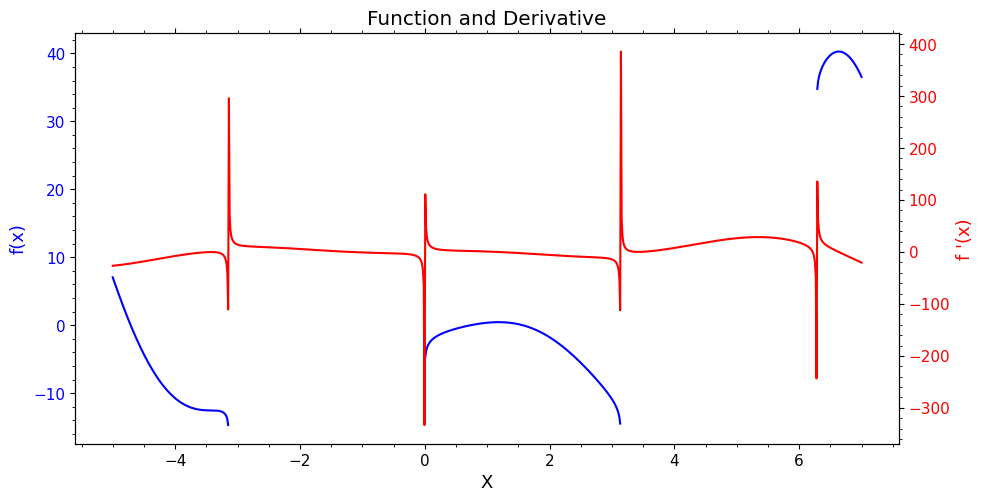

In [4]:
x = np.linspace(-5,7,1000)
func = f(x)
d_f = dif_f(x)

#Define the figure so we can have two y axis
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(x, func, label="Function", color="blue")
ax1.set_xlabel("X")
ax1.set_ylabel("f(x)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
#Second axis
ax2 = ax1.twinx()
ax2.plot(x, d_f, label="Derivative", color="red")
ax2.set_ylabel("f '(x)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

#Join plots and show the legend
fig.tight_layout() # avoids overlapping text
plt.title("Function and Derivative")
plt.show()

#### Analytical differentiation

In [5]:
x_o = 1.5

In [6]:
result_a = dif_f(x_o)

#### Dual differentiation

In [7]:
x_o = df.Dual(1.5,1)

In [8]:
def dual_func(x: df.Dual):
    if isinstance(x, df.Dual):
        return (x.sin()).log() + (x**2)*(x.cos())
    else: 
        print("x is not a Dual number")


In [9]:
result_d = dual_func(x_o)

#### Comparing analytical result and Dual result

In [10]:
result_d.dual == result_a

np.True_

In [11]:
data = pd.DataFrame({
    'Analytical Differentiation': [result_a],
    'Dual Differentiation': [result_d.dual]
})
data

,Analytical Differentiation,Dual Differentiation
0,-1.961237,-1.961237


As the result is true this means it is exactly the same result. Even so, I will compare the dual and the analytical differentiation for a larger interval.

#### Comparing Dual differentiation and Analytical differentiation

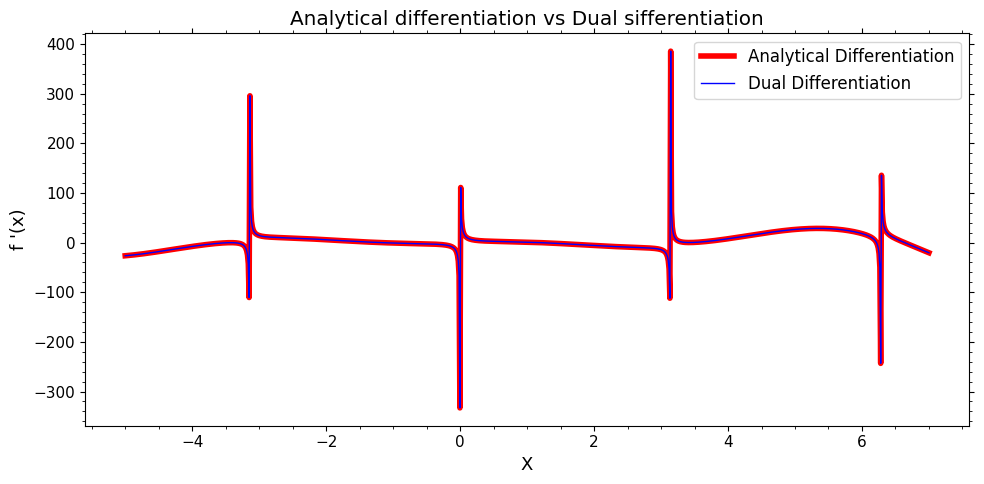

In [12]:
X = np.linspace(-5,7,1000)
d_f = dif_f(x)
x_dual = [df.Dual(x) for x in X]
df_dual = [dual_func(x).dual for x in x_dual]

#Define the figure so we can have two y axis
plt.figure(figsize=(10, 5))
plt.plot(x, d_f, label="Analytical Differentiation", color="red", linewidth=4)
plt.plot(X, df_dual, label="Dual Differentiation", color="blue", linewidth=1)
plt.xlabel("X")
plt.ylabel("f '(x)")
plt.title("Analytical differentiation vs Dual sifferentiation")
plt.legend()
plt.show()

#### Numerical differentiation

In [13]:
def num_cen_dif(x,function, h):
    return (function(x+h)-function(x-h))/(2*h)

def num_fow_dif(x,function, h):
    return (function(x+h)-function(x))/(h)

def num_bac_dif(x,function, h):
    return (function(x)-function(x-h))/(h)

In [14]:
H = [10**(-n) for n in range(100)]
x = 1.5
dif_cen_num = [num_cen_dif(x,f, h) for h in H]
dif_fow_num = [num_fow_dif(x,f, h) for h in H]
dif_bac_num = [num_bac_dif(x,f, h) for h in H]

#### Comparation between the three results for x=1.5

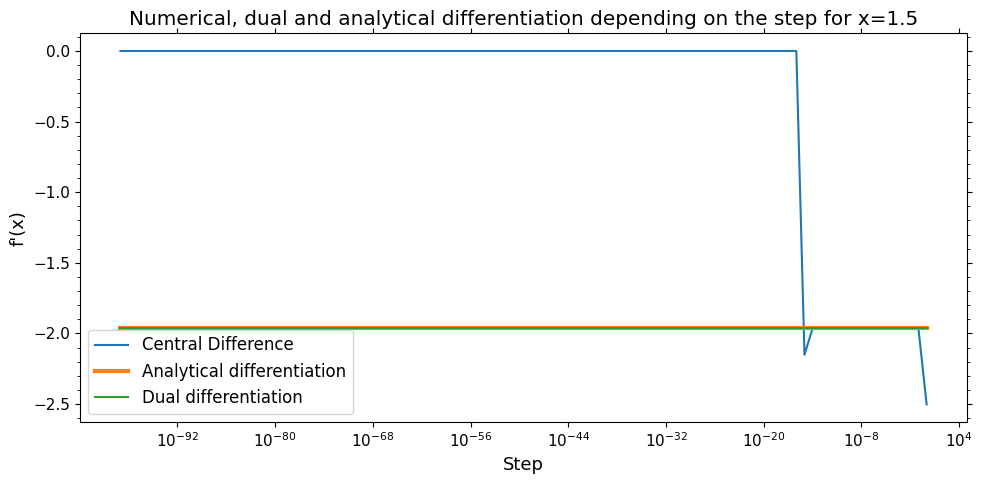

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(H, dif_cen_num, label="Central Difference")
plt.plot(H, [result_a for i in range(len(H))], label="Analytical differentiation", linewidth=3)
plt.plot(H, [result_d.dual for i in range(len(H))], label="Dual differentiation")
plt.xscale('log')
plt.xlabel("Step")
plt.ylabel("f'(x)")
plt.legend()
plt.title("Numerical, dual and analytical differentiation depending on the step for x=1.5")
plt.show()

#### Comparation between the three numerical defferentiation implemented and their errors

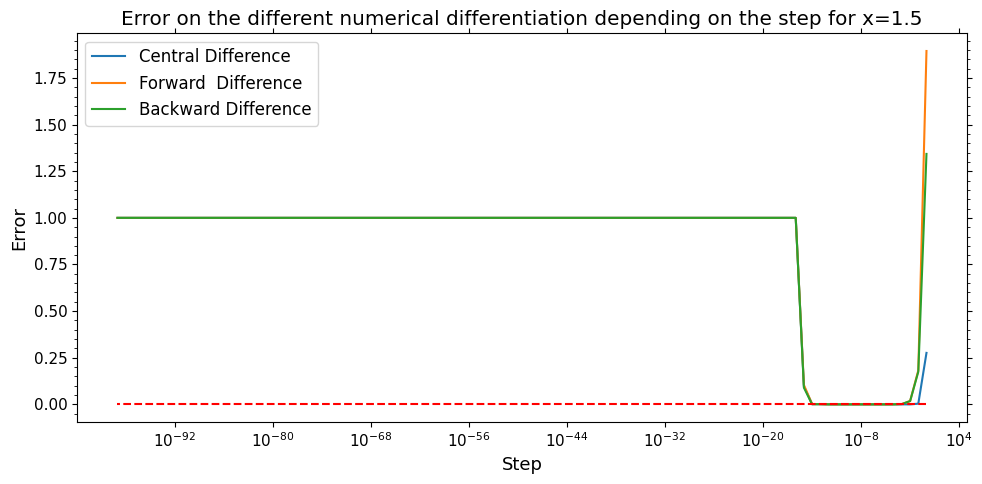

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(H, [np.abs(dif - result_a)/np.abs(result_a) for dif in dif_cen_num], label ="Central Difference")
plt.plot(H, [np.abs(dif - result_a)/np.abs(result_a) for dif in dif_fow_num], label ="Forward  Difference")
plt.plot(H, [np.abs(dif - result_a)/np.abs(result_a) for dif in dif_bac_num], label ="Backward Difference")
plt.plot(H, [0 for dif in dif_cen_num], '--', color='red')
plt.xscale('log')
plt.xlabel("Step")
plt.ylabel("Error")
plt.legend()
plt.title("Error on the different numerical differentiation depending on the step for x=1.5")
plt.show()

It is evident from the plot that the error varies in accordance with the step size. As anticipated, the application of central numerical differentiation, which is essentially an interpolation between two points equidistant from the point of interest, results in a certain degree of error when employing large steps. As the step size is reduced, the error approaches zero, reflecting the increased proximity of the points to the desired point. However, it can be observed that the error increases abruptly when a certain value of the step is crossed. With regard to the analytical aspect of the problem, this is an unexpected outcome, given that the steps are being decreased (the limit step is approaching zero), and the expectation is that an exact solution will be obtained. The source of this error can now be identified as being within the computational aspect of the problem, specifically the division of a number that is very close to zero, which has resulted in the floating problems that have been previously discussed. 

A comparison of the three types of numerical differentiation implemented reveals that the central difference method is more precise than the forward and backward difference methods. This outcome is anticipated, given that the central difference method exhibits a second-order error in h, whereas the other methods demonstrate a first-order error in h.
